# Cars Specifications Analysis

Dataset analysis of car specifications

- Data frame input from CVS file
- Using **Pandas** to clean, filter, and manipulate the dataset
- Using **Matplotlib** and **Seaborn** for plotting & visualization of datasets

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

carData = pd.read_csv("./sampleCarData.csv")

Here's some basic information on the data frame:

In [236]:
carData.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [237]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [238]:
carData.shape

(432, 15)

In [239]:
carData.describe(include='all')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,G35 4dr,Sedan,Asia,Front,"$33,995","$19,638",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


### Data Cleaning
1. Update datatypes of columns to fit the realistic datatype of the specification
2. Find all NULL values & fill values using mean of the column
3. If all the the specifications of the entry is NULL, then drop the row

In [240]:
carData.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [241]:
# Drop rows with all null values
# ----------------------------------------------------------------
carData = carData.dropna(how='all')
carData.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [242]:
str_fill_val = None
# STR_FILL_TYPE = 0 -> fill null str values with 'NaN'
# STR_FILL_TYPE = 1 -> fill null str values with mode value

# For now, let's say we want to fill values with the mode
str_fill_val = 1

# Fill in missing values 
# ----------------------------------------------------------------
for series_name, series in carData.items():
    if pd.api.types.is_numeric_dtype(series): # fill numeric values with mean
       carData[series_name] = series.fillna(series.mean())

    else: # fill object values based on requested condition
        if str_fill_val == 0:
            carData[series_name] = series.fillna('NaN')
        elif str_fill_val == 1:
            most_freq = series.mode()[0]
            print("Filling null values in \"" + series_name + "\" with: ", most_freq)
            carData[series_name] = series.fillna(most_freq)

        

Filling null values in "Make" with:  Toyota
Filling null values in "Model" with:  C240 4dr
Filling null values in "Type" with:  Sedan
Filling null values in "Origin" with:  Asia
Filling null values in "DriveTrain" with:  Front
Filling null values in "MSRP" with:  $13,270 
Filling null values in "Invoice" with:  $14,207 


Check for any more missing values:

In [243]:
carData.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

We're good!

In [244]:
# Now we can convert the datatypes to integer (since we can't have fraction of a cylinder)
carData['Cylinders'] = carData['Cylinders'].astype(int)
carData.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders        int32
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
dtype: object

### Data Visualization
1. Display the number of cars by make
2. Display MSRP distribution by number of cylinders

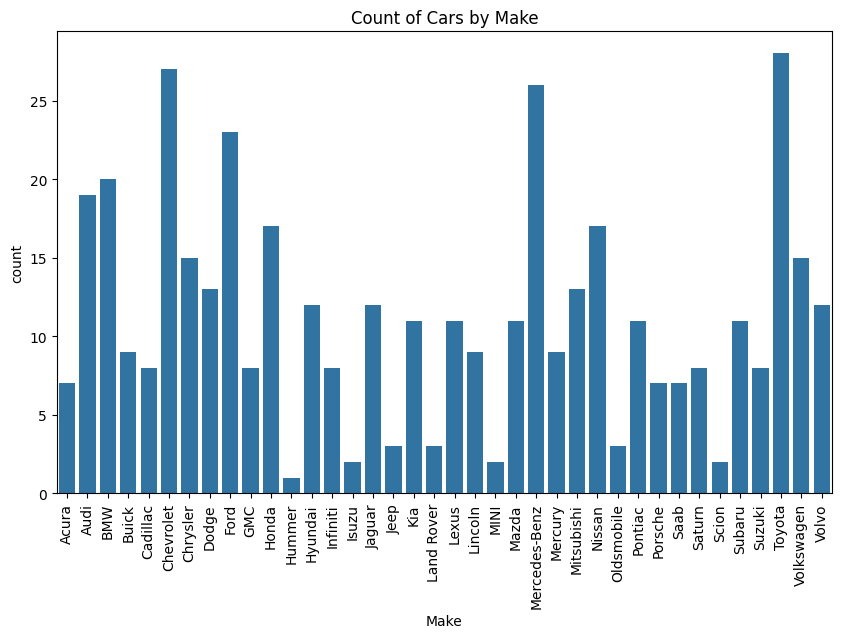

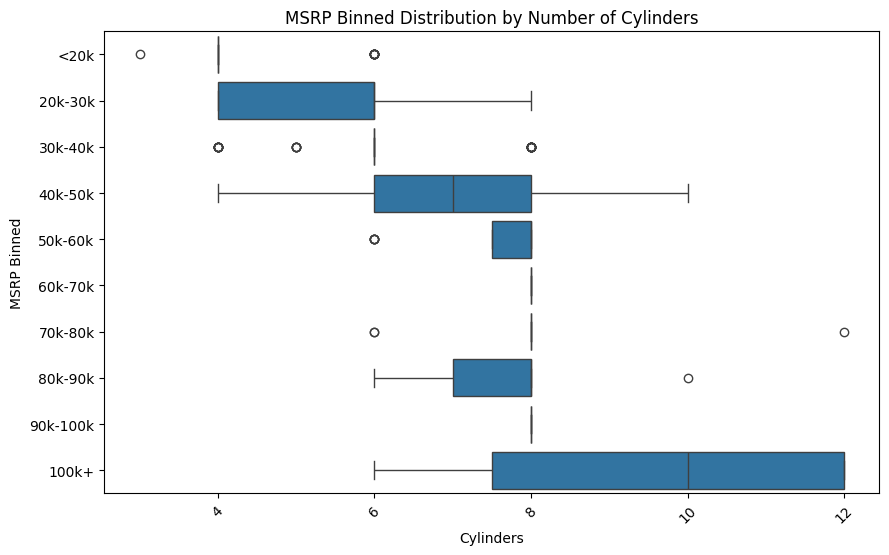

In [245]:
# Display Make distribution using a bar graph
# ----------------------------------------------------------------
plt.figure(figsize=(10, 6))
sb.countplot(x='Make', data=carData)
plt.title('Count of Cars by Make')
plt.xticks(rotation=90)
plt.show()

# Display MSRP distribution in correlation to cylinders
# ----------------------------------------------------------------

# Convert data values from object to float
carData['MSRP'] = carData['MSRP'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Categorize MSRP
bins = [0, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, float('inf')]
labels = ['<20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k+']
carData['MSRP Binned'] = pd.cut(carData['MSRP'].replace(0, np.nan), bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sb.boxplot(x='Cylinders', y='MSRP Binned', data=carData)
plt.title('MSRP Binned Distribution by Number of Cylinders')
plt.xticks(rotation=45)
plt.show()

### Check Make Types & Count Occurrences

In [246]:
carData.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP Binned
0,Acura,MDX,SUV,Asia,All,36945.0,"$33,337",3.5,6,265.0,17.0,23.0,4451.0,106.0,189.0,30k-40k
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,"$21,761",2.0,4,200.0,24.0,31.0,2778.0,101.0,172.0,20k-30k


In [247]:
carData['Make'].value_counts()

Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Dodge            13
Mitsubishi       13
Volvo            12
Jaguar           12
Hyundai          12
Subaru           11
Pontiac          11
Mazda            11
Lexus            11
Kia              11
Buick             9
Mercury           9
Lincoln           9
Saturn            8
Cadillac          8
Suzuki            8
Infiniti          8
GMC               8
Acura             7
Porsche           7
Saab              7
Land Rover        3
Oldsmobile        3
Jeep              3
Scion             2
Isuzu             2
MINI              2
Hummer            1
Name: count, dtype: int64

### Filtering Values
Filtering for all recrods where origin is Asia or Europe

In [248]:
carData[carData['Origin'].isin(['Asia', 'Europe'])]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP Binned
0,Acura,MDX,SUV,Asia,All,36945.0,"$33,337",3.5,6,265.0,17.0,23.0,4451.0,106.0,189.0,30k-40k
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,"$21,761",2.0,4,200.0,24.0,31.0,2778.0,101.0,172.0,20k-30k
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,"$24,647",2.4,4,200.0,22.0,29.0,3230.0,105.0,183.0,20k-30k
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,"$30,299",3.2,6,270.0,20.0,28.0,3575.0,108.0,186.0,30k-40k
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,"$39,014",3.5,6,225.0,18.0,24.0,3880.0,115.0,197.0,40k-50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,"$38,203",2.4,5,197.0,21.0,28.0,3450.0,105.0,186.0,40k-50k
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,"$40,083",2.3,5,242.0,20.0,26.0,3450.0,105.0,186.0,40k-50k
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,"$42,573",2.9,6,268.0,19.0,26.0,3653.0,110.0,190.0,40k-50k
430,Volvo,V40,Wagon,Europe,Front,26135.0,"$24,641",1.9,4,170.0,22.0,29.0,2822.0,101.0,180.0,20k-30k


Check for records with duplicates of the same model:

In [249]:
# Filter to get duplicate models
carData.groupby('Model').filter(lambda x: len(x) > 1)


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP Binned
183,Infiniti,G35 4dr,Sedan,Asia,Rear,28495.0,"$26,157",3.5,6,260.0,18.0,26.0,3336.0,112.0,187.0,20k-30k
185,Infiniti,G35 4dr,Sedan,Asia,All,32445.0,"$29,783",3.5,6,260.0,18.0,26.0,3677.0,112.0,187.0,30k-40k
259,Mercedes-Benz,C240 4dr,Sedan,Europe,Rear,32280.0,"$30,071",2.6,6,168.0,20.0,25.0,3360.0,107.0,178.0,30k-40k
260,Mercedes-Benz,C240 4dr,Sedan,Europe,All,33480.0,"$31,187",2.6,6,168.0,19.0,25.0,3360.0,107.0,178.0,30k-40k
262,Mercedes-Benz,C320 4dr,Sedan,Europe,Rear,37630.0,"$35,046",3.2,6,215.0,20.0,26.0,3450.0,107.0,178.0,30k-40k
263,Mercedes-Benz,C320 4dr,Sedan,Europe,All,38830.0,"$36,162",3.2,6,215.0,19.0,27.0,3450.0,107.0,178.0,30k-40k


### Instructions
1. Remove all records where weight is above 4000
2. Increae all values of "MPG_City" column by 3

In [250]:
carData[~(carData['Weight'] > 4000)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP Binned
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,"$21,761",2.0,4,200.0,24.0,31.0,2778.0,101.0,172.0,20k-30k
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,"$24,647",2.4,4,200.0,22.0,29.0,3230.0,105.0,183.0,20k-30k
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,"$30,299",3.2,6,270.0,20.0,28.0,3575.0,108.0,186.0,30k-40k
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,"$39,014",3.5,6,225.0,18.0,24.0,3880.0,115.0,197.0,40k-50k
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100.0,"$41,100",3.5,6,225.0,18.0,24.0,3893.0,115.0,197.0,40k-50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,"$38,203",2.4,5,197.0,21.0,28.0,3450.0,105.0,186.0,40k-50k
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,"$40,083",2.3,5,242.0,20.0,26.0,3450.0,105.0,186.0,40k-50k
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,"$42,573",2.9,6,268.0,19.0,26.0,3653.0,110.0,190.0,40k-50k
430,Volvo,V40,Wagon,Europe,Front,26135.0,"$24,641",1.9,4,170.0,22.0,29.0,2822.0,101.0,180.0,20k-30k


In [252]:
carData['MPG_City'] = carData['MPG_City'].apply(lambda x:x+3)

In [253]:
carData
# Notice all values under MPG_City has increased by 3

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP Binned
0,Acura,MDX,SUV,Asia,All,36945.0,"$33,337",3.5,6,265.0,20.0,23.0,4451.0,106.0,189.0,30k-40k
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,"$21,761",2.0,4,200.0,27.0,31.0,2778.0,101.0,172.0,20k-30k
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,"$24,647",2.4,4,200.0,25.0,29.0,3230.0,105.0,183.0,20k-30k
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,"$30,299",3.2,6,270.0,23.0,28.0,3575.0,108.0,186.0,30k-40k
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,"$39,014",3.5,6,225.0,21.0,24.0,3880.0,115.0,197.0,40k-50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,"$38,203",2.4,5,197.0,24.0,28.0,3450.0,105.0,186.0,40k-50k
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,"$40,083",2.3,5,242.0,23.0,26.0,3450.0,105.0,186.0,40k-50k
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,"$42,573",2.9,6,268.0,22.0,26.0,3653.0,110.0,190.0,40k-50k
430,Volvo,V40,Wagon,Europe,Front,26135.0,"$24,641",1.9,4,170.0,25.0,29.0,2822.0,101.0,180.0,20k-30k


### Correlation Analysis
Generate correlation matrix between all numeric data points

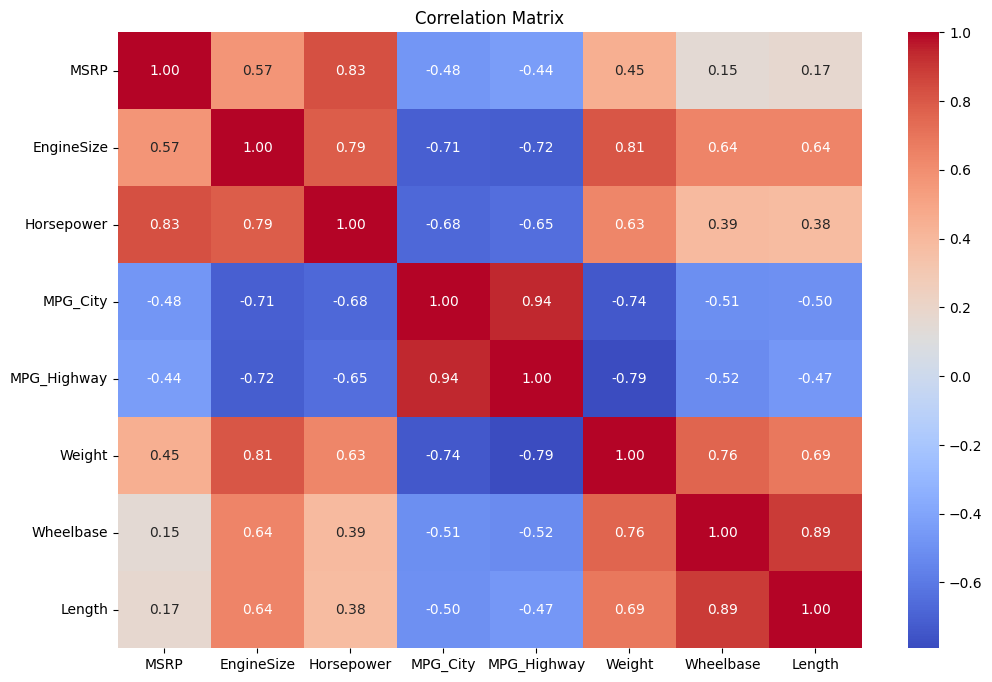

In [254]:
numericData = carData.select_dtypes(include=['float64'])
corrMatrix = numericData.corr()

# Display the correlation matrix
# ----------------------------------------------------------------
plt.figure(figsize=(12, 8))
sb.heatmap(corrMatrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()